In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import numpy as np
import dask.array as da
import matplotlib.pyplot as plt

from nata.containers import GridDataset
from nata.containers import GridArray
from nata.containers import Axis
from nata.plugins.register import register_container_plugin

# Slice

The grid `.slice()` plugin returns a lower dimensionality slice of the original `GridArray` or `GridDataset`.

In [3]:
grid = GridArray.from_array(
    np.arange(96).reshape((8, 4, 3))
)
grid


| **GridArray** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (8, 4, 3) |
| **dtype** | int64 |
| **time**  | 0.0 |
| **axes**  | Axis(axis0), Axis(axis1), Axis(axis2) |



Both the axis name or its index can be used to select the slicing direction.

In [4]:
sliced_grid = grid.slice(constant="axis0", value=0)
sliced_grid.shape

(4, 3)

In [5]:
sliced_grid = grid.slice(constant=0, value=0)
sliced_grid.shape

(4, 3)

When using axis indices, negative values are also supported.

In [6]:
sliced_grid = grid.slice(constant=-1, value=0)
sliced_grid.shape

(8, 4)

When slicing `GridDataset`, time dependence is always preserved.

In [7]:
grid = GridDataset.from_array(
    np.arange(96).reshape((8, 4, 3))
)
grid


| **GridDataset** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (8, 4, 3) |
| **dtype** | int64 |
| **time**  | [0 1 2 3 4 5 6 7] |
| **axes**  | Axis(time), Axis(axis0), Axis(axis1) |



In [8]:
sliced_grid = grid.slice(constant="axis0", value=0)
sliced_grid


| **GridDataset** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (8, 3) |
| **dtype** | int64 |
| **time**  | [0 1 2 3 4 5 6 7] |
| **axes**  | Axis(time), Axis(axis1) |



Slices are not allowed along the time axis.

In [9]:
try:
    grid.slice(constant="time", value=0)
except ValueError:
    print("slice along the time axis is not supported")

slice along the time axis is not supported


Slices are allowed along moving axis as long as the value at which they are taken exists in the corresponding axis for all times.

In [10]:
x = np.arange(10)
grid = GridDataset.from_array(
    np.tile(x, (5, 1)), 
    axes=[
        Axis.from_array(np.arange(5), name="t"), 
        Axis.from_array([x, x+1, x+2, x+3, x+4], name="x1"),
    ]
)
grid.slice(constant="x1", value=5)


| **GridDataset** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (5,) |
| **dtype** | int64 |
| **time**  | [0 1 2 3 4] |
| **axes**  | Axis(t) |



# Transpose

The grid `.transpose()` plugin reverses or permutes the axes of a `GridArray` or `GridDataset`.

In [11]:
grid = GridArray.from_array(
    np.arange(96).reshape((8, 4, 3)),
)
grid


| **GridArray** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (8, 4, 3) |
| **dtype** | int64 |
| **time**  | 0.0 |
| **axes**  | Axis(axis0), Axis(axis1), Axis(axis2) |



If no arguments are provided, the axes order is reversed.

In [12]:
grid.transpose()


| **GridArray** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (3, 4, 8) |
| **dtype** | int64 |
| **time**  | 0.0 |
| **axes**  | Axis(axis2), Axis(axis1), Axis(axis0) |



The `axes` argument can be used to specify the desired axes order.

In [13]:
grid.transpose(axes=[1, 2, 0])


| **GridArray** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (4, 3, 8) |
| **dtype** | int64 |
| **time**  | 0.0 |
| **axes**  | Axis(axis1), Axis(axis2), Axis(axis0) |



When transposing a `GridDataset`, time dependence is always preserved.

In [14]:
grid = GridDataset.from_array(
    np.arange(96).reshape((8, 4, 3))
)
grid


| **GridDataset** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (8, 4, 3) |
| **dtype** | int64 |
| **time**  | [0 1 2 3 4 5 6 7] |
| **axes**  | Axis(time), Axis(axis0), Axis(axis1) |



In [15]:
grid.transpose()


| **GridDataset** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (8, 3, 4) |
| **dtype** | int64 |
| **time**  | [0 1 2 3 4 5 6 7] |
| **axes**  | Axis(time), Axis(axis1), Axis(axis0) |



The `axes` argument can be used to specify the desired order in non-temporal axes.

In [16]:
grid.transpose(axes=[2, 1])


| **GridDataset** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (8, 3, 4) |
| **dtype** | int64 |
| **time**  | [0 1 2 3 4 5 6 7] |
| **axes**  | Axis(time), Axis(axis1), Axis(axis0) |



In [17]:
try:
    grid.transpose(axes=[1, 2, 0])
except ValueError:
    print("transpose along the time axis is not supported")

transpose along the time axis is not supported


In [18]:
np.transpose(1)

array(1)

# Fast Fourier Transform (FFT)

The grid `.fft()` plugin returns the FFT of the original `GridDataset`.

If the `comp` argument is not provided, `.fft()` returns the absolute value of the FFT.

In [19]:
x = np.linspace(0, 10*np.pi, 101)

grid = GridArray.from_array(
    np.sin(x),
    name="dataset",
    unit="A",
    axes=[
        Axis.from_array(x, name="x1", label="x1", unit="a")
    ]
)
fft_grid = grid.fft()
fft_grid


| **GridArray** | |
| ---: | :--- |
| **name**  | dataset |
| **label** | |unlabeled| |
| **unit**  | A |
| **shape** | (101,) |
| **dtype** | float64 |
| **time**  | 0.0 |
| **axes**  | Axis(k_x1) |



The axes over which the FFT is computed are transformed such thatthe zero frequency bins are centered.

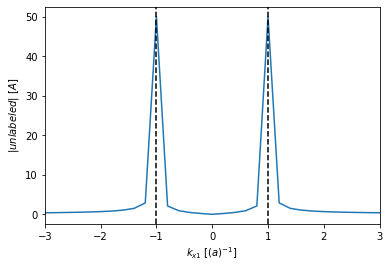

In [20]:
fig, ax = plt.subplots()

ax.plot(fft_grid.axes[0].to_dask(), fft_grid.to_dask())
ax.set_xlim((-3, 3))
ax.set_xlabel(f"${fft_grid.axes[0].label}$ [${fft_grid.axes[0].unit}$]")
ax.set_ylabel(f"${fft_grid.label}$ [${fft_grid.unit}$]")
ax.axvline(+1, c="k", ls="--")
ax.axvline(-1, c="k", ls="--")
fig.show()

If `comp` is provided, `.fft()` returns the corresponding component of the FFT.

In [21]:
fft_grid = grid.fft(comp="imag")
fft_grid


| **GridArray** | |
| ---: | :--- |
| **name**  | dataset |
| **label** | \Im(unlabeled) |
| **unit**  | A |
| **shape** | (101,) |
| **dtype** | float64 |
| **time**  | 0.0 |
| **axes**  | Axis(k_x1) |



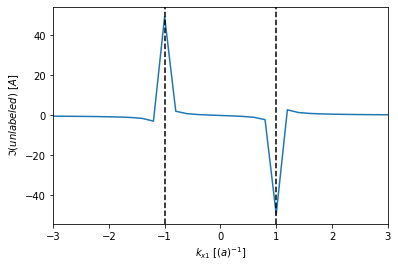

In [22]:
fig, ax = plt.subplots()

ax.plot(fft_grid.axes[0].to_dask(), fft_grid.to_dask())
ax.set_xlim((-3, 3))
ax.set_xlabel(f"${fft_grid.axes[0].label}$ [${fft_grid.axes[0].unit}$]")
ax.set_ylabel(f"${fft_grid.label}$ [${fft_grid.unit}$]")
ax.axvline(+1, c="k", ls="--")
ax.axvline(-1, c="k", ls="--")
fig.show()

When applied to multidimensional grids, the `axes` argument controls the axes over which the FFT is computed. If `axes` is not provided, the FFT is computed over all available grid axes.

In [23]:
x = np.linspace(0, 10*np.pi, 101)
y = np.linspace(0, 10*np.pi, 201)

X,Y = np.meshgrid(x, y, indexing="ij")

grid = GridArray.from_array(
    np.sin(X) + np.sin(2*Y),
    name="dataset",
    axes=[
        Axis.from_array(x, name="x1", label="x_1", unit="a"),
        Axis.from_array(y, name="x2", label="x_2", unit="b")
    ]
)
fft_grid = grid.fft()
fft_grid


| **GridArray** | |
| ---: | :--- |
| **name**  | dataset |
| **label** | |unlabeled| |
| **unit**  | '' |
| **shape** | (101, 201) |
| **dtype** | float64 |
| **time**  | 0.0 |
| **axes**  | Axis(k_x1), Axis(k_x2) |



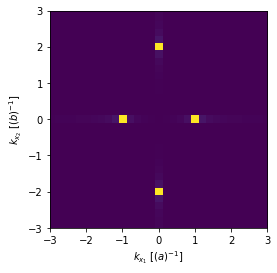

In [24]:
fig, ax = plt.subplots()

im = ax.imshow(
    np.transpose(fft_grid.to_dask()), 
    extent=(
        np.min(fft_grid.axes[0].to_dask()),
        np.max(fft_grid.axes[0].to_dask()),
        np.min(fft_grid.axes[1].to_dask()),
        np.max(fft_grid.axes[1].to_dask())
    ),
    origin="lower",
)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.set_xlabel(f"${fft_grid.axes[0].label}$ [${fft_grid.axes[0].unit}$]")
ax.set_ylabel(f"${fft_grid.axes[1].label}$ [${fft_grid.axes[1].unit}$]")

fig.show()

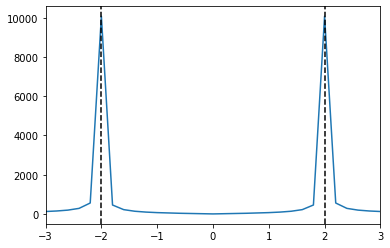

In [25]:
fig, ax = plt.subplots()

ax.plot(fft_grid.axes[1].to_dask(), fft_grid.to_dask()[50, :])
ax.set_xlim((-3, 3))
ax.axvline(+2, c="k", ls="--")
ax.axvline(-2, c="k", ls="--")
fig.show()

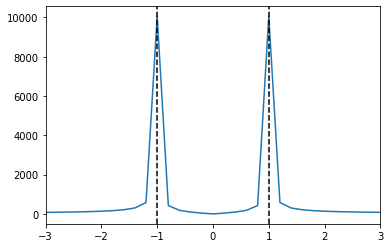

In [26]:
fig, ax = plt.subplots()

ax.plot(fft_grid.axes[0].to_dask(), fft_grid.to_dask()[:, 100])
ax.set_xlim((-3, 3))
ax.axvline(+1, c="k", ls="--")
ax.axvline(-1, c="k", ls="--")
fig.show()

If `axes` is provided, the FFT is only computed over the identified grid axes. Both strings (corresponding to axes names) and integers can be provided in `axes`.

In [27]:
fft_grid = grid.fft(axes=["x2"])
fft_grid


| **GridArray** | |
| ---: | :--- |
| **name**  | dataset |
| **label** | |unlabeled| |
| **unit**  | '' |
| **shape** | (101, 201) |
| **dtype** | float64 |
| **time**  | 0.0 |
| **axes**  | Axis(x1), Axis(k_x2) |



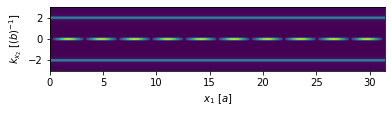

In [28]:
fig, ax = plt.subplots()

im = ax.imshow(
    np.transpose(fft_grid.to_numpy()), 
    extent=(
        np.min(fft_grid.axes[0].to_dask()),
        np.max(fft_grid.axes[0].to_dask()),
        np.min(fft_grid.axes[1].to_dask()),
        np.max(fft_grid.axes[1].to_dask())
    ),
    origin="lower",
)
ax.set_ylim(-3, 3)

ax.set_xlabel(f"${fft_grid.axes[0].label}$ [${fft_grid.axes[0].unit}$]")
ax.set_ylabel(f"${fft_grid.axes[1].label}$ [${fft_grid.axes[1].unit}$]")

fig.show()

In [29]:
time = np.arange(3)
x = np.linspace(0, 10*np.pi, 101)

grid = GridDataset.from_array(
    [np.sin(x), np.sin(2*x), np.sin(3*x)],
    name="dataset",
    label="S",
    unit="A",
    axes=[
        Axis.from_array(time),
        Axis.from_array(np.tile(x, (3, 1)), name="x1", label="x_1", unit="a")
    ]
)
fft_grid = grid.fft(comp="abs")
fft_grid


| **GridDataset** | |
| ---: | :--- |
| **name**  | dataset |
| **label** | |S| |
| **unit**  | A |
| **shape** | (3, 101) |
| **dtype** | float64 |
| **time**  | [0 1 2] |
| **axes**  | Axis(unnamed), Axis(k_x1) |



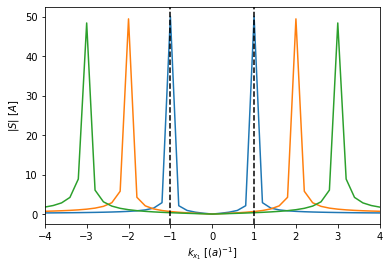

In [30]:
fig, ax = plt.subplots()

for fft_grid_i in fft_grid:
    ax.plot(fft_grid_i.axes[0].to_dask(), fft_grid_i.to_dask())
ax.set_xlim((-4, 4))
ax.set_xlabel(f"${fft_grid.axes[1].label}$ [${fft_grid.axes[1].unit}$]")
ax.set_ylabel(f"${fft_grid.label}$ [${fft_grid.unit}$]")
ax.axvline(+1, c="k", ls="--")
ax.axvline(-1, c="k", ls="--")
fig.show()

# Streak

The `.streak()` converts a `GridDataset` to a `GridArray`.

In [31]:
grid = GridDataset.from_array(
    np.arange(5*7).reshape((5, 7))
)
stk_grid = grid.streak()
stk_grid


| **GridArray** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (5, 7) |
| **dtype** | int64 |
| **time**  | 0.0 |
| **axes**  | Axis(time), Axis(axis0) |



The grid shape is maintained.

In [32]:
stk_grid.shape

(5, 7)

All axes in `grid` are converted to time-independent axes.

In [33]:
[axis.shape for axis in stk_grid.axes]

[(5,), (7,)]

In [34]:
time = np.arange(3)
x = np.linspace(0, 10*np.pi, 101)

grid = GridDataset.from_array(
    np.tile(x, (3, 1)),
    name="dataset",
    label="S",
    unit="A",
    axes=[
        Axis.from_array(time),
        Axis.from_array([x, x+1, x+2])
    ]
)
grid


| **GridDataset** | |
| ---: | :--- |
| **name**  | dataset |
| **label** | S |
| **unit**  | A |
| **shape** | (3, 101) |
| **dtype** | float64 |
| **time**  | [0 1 2] |
| **axes**  | Axis(unnamed), Axis(unnamed) |



In [35]:
try:
    stk_grid = grid.streak()
except ValueError:
    print("strak is not supported for GridDatasets with time-dependent axes")

strak is not supported for GridDatasets with time-dependent axes
